# Computer Price Analysis Report

### TEAM MEMBERS: DEBADRI SANYAL (SANYALD@PURDUE.EDU) AND SARA TARIQ (TARIQ15@PURDUE.EDU)
This notebook presents a structured exploration of computer pricing trends based on detailed system specifications and brand-level information.  
The objective is to identify the key technical and market features that drive pricing differences, validate them statistically, and translate those insights into actionable business recommendations.


## Dataset Description

The dataset used in this analysis contains detailed information about computer systems across multiple brands, configurations, and price ranges.  
Each record represents a unique computer product listed in the consumer market, providing a snapshot of its technical specifications and retail pricing.

### Key Attributes:
- **Brand / Manufacturer:** The company that produces the computer (e.g., Dell, HP, Lenovo, Asus, Acer).  
- **System Type:** Categorized as *Desktop*, *Laptop*, or *Other*, based on product form factor.  
- **Price:** The retail or listed price of the system (may include formatted values such as “$1,299.00”).  
- **RAM (Memory):** System memory capacity, typically measured in gigabytes (GB).  
- **CPU (Processor):** Processor model or family (e.g., Intel i5, i7, AMD Ryzen series).  
- **GPU (Graphics):** Graphics processing unit name or type, which determines graphical performance.  
- **Storage (if available):** Storage capacity of the system (SSD/HDD), measured in GB or TB.  
- **Release Year or Date:** The year or approximate release date of the product, used for time-based trend analysis.

### Analytical Relevance:
- **Price** serves as the dependent variable, influenced by system configuration and brand.  
- **RAM**, **CPU**, and **GPU** act as major independent variables that represent performance attributes.  
- **System Type** and **Brand** enable categorical segmentation of the market.  
- **Year/Date** attributes allow exploration of temporal pricing trends and technology adoption rates.

### Data Characteristics:
- Contains both numerical and categorical variables.  
- May include missing or inconsistent values typical of real-world commercial data.  
- Represents a mix of consumer and professional systems, suitable for exploratory and inferential analysis.

**Purpose of this Dataset:**  
To analyze how hardware configurations, system type, and brand positioning collectively influence computer pricing in the market, and to uncover trends that inform data-driven business decisions.

### Dataset Source:
This dataset was obtained from **Kaggle**, an open data platform for data science and machine learning projects.  
You can access it here:  
[Computer Prices Dataset on Kaggle](https://www.kaggle.com/datasets/paperxd/all-computer-prices?resource=download)


## Executive Summary

This report analyzes how computer hardware characteristics—such as RAM, GPU, CPU brand, and system type—impact pricing in the consumer technology market.  
The study applies statistical and visual techniques, including descriptive analytics, correlation, hypothesis testing, and time-series analysis.

Findings show that **RAM capacity**, **GPU type**, and **system category (Desktop vs Laptop)** are the strongest predictors of computer prices.  
Statistical evidence indicates that gaming GPUs and higher RAM configurations significantly increase prices, while Intel and AMD CPUs are priced similarly on average.  
Time-based trends reveal gradual increases in median prices, reflecting technological advancement and consumer demand for higher specifications.

**Key Recommendations:**
1. Implement tiered pricing models based on RAM and GPU levels.  
2. Focus marketing efforts on high-performance and gaming systems where price elasticity is favorable.  
3. Position AMD systems as strong value alternatives in price-sensitive markets.  
4. Use yearly price trends to guide product launch timing and promotional cycles.  

Overall, this report transforms raw product data into actionable insights for pricing optimization and product strategy alignment.


## Report Overview

This report is organized into eight key analytical sections:

1. **Setup & Utilities** – Load required libraries and define helper functions for data cleaning.  
2. **Data Loading & Cleaning** – Import, inspect, and standardize the dataset.  
3. **Descriptive Statistics** – Explore fundamental numerical characteristics and identify distribution patterns.  
4. **Correlation Analysis** – Evaluate which specifications most strongly influence pricing.  
5. **Exploratory Visualizations** – Visualize brand and system-level pricing behaviors.  
6. **Hypothesis Testing** – Validate whether observed differences in price are statistically significant.  
7. **Time Series Analysis** – Assess price evolution over time to uncover macro trends.  
8. **Business Insights & Recommendations** – Synthesize findings into practical strategic actions.  

Each section includes a *"What & Why"* explanation, executable analysis code, and a concluding interpretation describing its business relevance.


## 1. Setup & Utilities — What & Why

Before beginning the analysis, we import necessary Python libraries and define core functions to prepare the dataset.

**Functions Defined:**
- `coerce_numeric()`: Converts formatted price strings into numeric values.  
- `find_col()`: Detects relevant column names automatically.  
- `handle_missing_values()`: Handles missing data by dropping sparse columns and imputing reasonable defaults.  

**Why This Matters:**  
Clean, structured data ensures all subsequent analyses produce reliable, business-valid insights.


In [29]:

# =============================================================================
# SETUP
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams.update({"figure.figsize": (10, 6), "axes.grid": True})
sns.set(style="whitegrid")

# Path to your CSV. Update if needed.
CSV_PATH = r"C:/Users/DOUBLEDO_GAMING/.spyder-py3/Dataset/computer_prices_all.csv"

# =============================================================================
# HELPER FUNCTIONS
# =============================================================================
def coerce_numeric(series):
    """Safely convert strings like '$1,299.00' or '1.2e3' to numeric."""
    clean = (series.astype(str)
                   .str.replace(r"[^\d\.\-eE]", "", regex=True)
                   .replace(["", "e", "E", ".", "-", "--"], np.nan))
    return pd.to_numeric(clean, errors="coerce")

def find_col(cols, keywords):
    """Find column name by keyword match."""
    for c in cols:
        if any(k in c.lower() for k in keywords):
            return c
    return None

def handle_missing_values(df):
    """Handles missing values robustly."""
    print("\n=== Handling Missing Values ===")
    total_missing = df.isna().sum()
    missing_ratio = (total_missing / len(df)) * 100
    missing_report = pd.DataFrame({"Missing Values": total_missing, "% Missing": missing_ratio})
    try:
        display(missing_report.sort_values("% Missing", ascending=False).head(10))
    except Exception:
        print(missing_report.sort_values("% Missing", ascending=False).head(10))

    # Drop columns with >70% missing
    drop_cols = missing_ratio[missing_ratio > 70].index.tolist()
    if drop_cols:
        print(f"\n Dropping columns with >70% missing values: {drop_cols}")
        df = df.drop(columns=drop_cols)

    # Fill numeric columns with median
    for col in df.select_dtypes(include=[np.number]).columns:
        if df[col].isna().any():
            med = df[col].median()
            df[col].fillna(med, inplace=True)
            print(f"Filled NaN in numeric column '{col}' with median={med:.2f}")

    # Fill categorical columns with mode
    for col in df.select_dtypes(exclude=[np.number]).columns:
        if df[col].isna().any():
            mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else "Unknown"
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled NaN in categorical column '{col}' with mode='{mode_val}'")

    print("\n Missing-value handling complete.\n")
    return df


### Business Insight

By cleaning and preparing the data early, we ensure that no faulty or missing information distorts price comparisons or misrepresents feature importance.  
This step mirrors the preprocessing pipeline used in professional analytics workflows.


## 2. Data Loading & Cleaning — What & Why

In this stage, we:
1. Load the dataset into a DataFrame.  
2. Automatically identify key attributes like `price`, `brand`, `RAM`, `CPU`, `GPU`, and `system type`.  
3. Standardize system categories into "Desktop", "Laptop", and "Other".  
4. Handle missing values and remove duplicates to ensure dataset quality.

**Why This Matters:**  
Establishes a consistent and trustworthy foundation for accurate analysis of pricing dynamics.


In [30]:

def load_and_clean_data(csv_path):
    df = pd.read_csv(csv_path)
    print(f" Loaded dataset with shape {df.shape}\n")
    print("Columns:", list(df.columns))
    try:
        display(df.head())
    except Exception:
        print(df.head())

    # Identify columns
    price_col = find_col(df.columns, ["price", "cost", "msrp"])
    brand_col = find_col(df.columns, ["brand", "maker", "manufacturer", "vendor", "company"])
    ram_col = find_col(df.columns, ["ram", "memory"])
    cpu_col = find_col(df.columns, ["cpu", "processor", "chip", "intel", "amd", "ryzen"])
    gpu_col = find_col(df.columns, ["gpu", "graphics", "rtx", "gtx", "radeon", "arc", "iris"])
    system_col = find_col(df.columns, ["system", "type", "category", "model"])

    # Coerce numerics
    if price_col and not pd.api.types.is_numeric_dtype(df[price_col]):
        df[price_col] = coerce_numeric(df[price_col])
    if ram_col and not pd.api.types.is_numeric_dtype(df[ram_col]):
        df[ram_col] = coerce_numeric(df[ram_col])

    df.drop_duplicates(inplace=True)
    df = handle_missing_values(df)

    # Normalize system type
    if system_col:
        df[system_col] = df[system_col].astype(str).str.title()
        df[system_col] = np.where(df[system_col].str.contains("Desk", case=False), "Desktop",
                                  np.where(df[system_col].str.contains("Lap|Note", case=False), "Laptop", "Other"))
    else:
        print(" No explicit system type column detected.")
        system_col = None

    return df, price_col, brand_col, ram_col, cpu_col, gpu_col, system_col

# Call
df, price_col, brand_col, ram_col, cpu_col, gpu_col, system_col = load_and_clean_data(CSV_PATH)


 Loaded dataset with shape (100000, 33)

Columns: ['device_type', 'brand', 'model', 'release_year', 'os', 'form_factor', 'cpu_brand', 'cpu_model', 'cpu_tier', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz', 'gpu_brand', 'gpu_model', 'gpu_tier', 'vram_gb', 'ram_gb', 'storage_type', 'storage_gb', 'storage_drive_count', 'display_type', 'display_size_in', 'resolution', 'refresh_hz', 'battery_wh', 'charger_watts', 'psu_watts', 'wifi', 'bluetooth', 'weight_kg', 'warranty_months', 'price']


,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99



=== Handling Missing Values ===


,Missing Values,% Missing
device_type,0,0.0
brand,0,0.0
model,0,0.0
release_year,0,0.0
os,0,0.0
form_factor,0,0.0
cpu_brand,0,0.0
cpu_model,0,0.0
cpu_tier,0,0.0
cpu_cores,0,0.0



 Missing-value handling complete.



### Business Insight (after cleaning)

A clean dataset means each system record is unique, all numeric fields are interpretable, and no crucial data gaps remain.  
This ensures valid statistical comparisons between brands and product categories, mirroring how real-world business data is curated for reliability.


## 3. Descriptive Statistics — What & Why

This section summarizes all numerical features in the dataset.  
We calculate **mean**, **median**, **mode**, and **standard deviation** and visualize how these metrics differ across variables.

**Why This Matters:**  
Helps detect **skewness**, identify **feature variability**, and flag potential **outliers** influencing average pricing.



=== DESCRIPTIVE STATISTICS ===


,count,mean,std,min,25%,50%,75%,max,mode
release_year,100000.0,2022.32,2.03,2018.00,2021.00,2023.00,2024.00,2025.00,2023.00
cpu_tier,100000.0,3.15,1.37,1.00,2.00,3.00,4.00,6.00,3.00
cpu_cores,100000.0,10.52,5.04,4.00,6.00,8.00,14.00,28.00,8.00
cpu_threads,100000.0,19.37,9.72,4.00,12.00,16.00,24.00,56.00,16.00
cpu_base_ghz,100000.0,2.59,0.34,2.00,2.40,2.60,2.80,3.40,2.60
cpu_boost_ghz,100000.0,3.53,0.35,2.80,3.30,3.50,3.80,4.50,3.50
gpu_tier,100000.0,2.99,1.46,1.00,2.00,3.00,4.00,6.00,3.00
vram_gb,100000.0,6.15,3.96,0.00,4.00,6.00,8.00,16.00,4.00
ram_gb,100000.0,39.71,31.90,8.00,16.00,32.00,64.00,144.00,32.00
storage_gb,100000.0,903.94,774.24,256.00,512.00,512.00,1024.00,4096.00,512.00


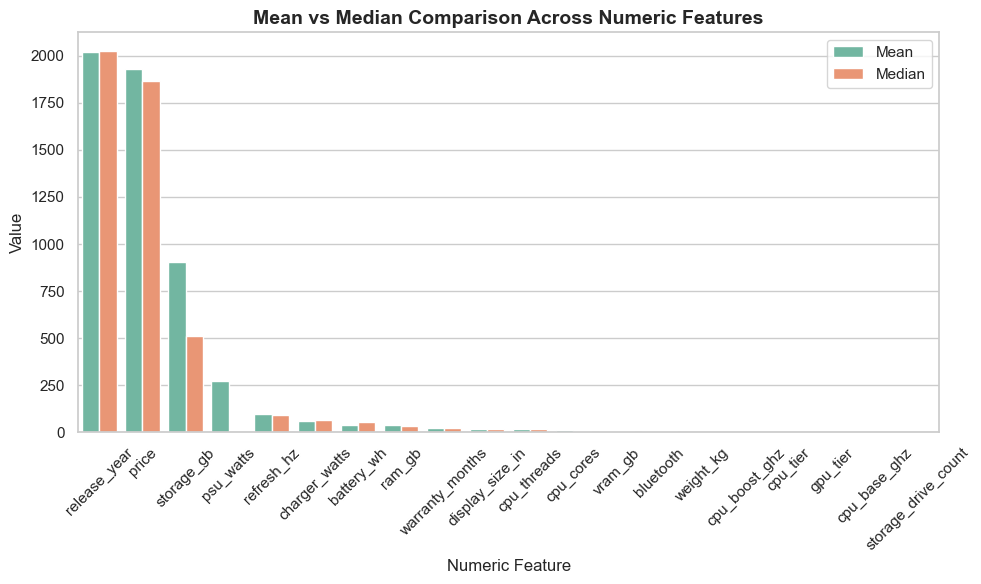

In [31]:

def descriptive_statistics(df):
    num_df = df.select_dtypes(include=[np.number])
    print("\n=== DESCRIPTIVE STATISTICS ===")
    desc = num_df.describe().T
    desc["mode"] = [num_df[c].mode().iloc[0] if not num_df[c].mode().empty else np.nan for c in num_df.columns]
    try:
        display(desc.round(2))
    except Exception:
        print(desc.round(2))

    summary_stats = pd.DataFrame({
        "Mean": num_df.mean(),
        "Median": num_df.median(),
        "Std Dev": num_df.std()
    }).sort_values("Mean", ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(data=summary_stats.reset_index().melt(id_vars="index", value_vars=["Mean","Median"]),
                x="index", y="value", hue="variable", palette="Set2")
    plt.title("Mean vs Median Comparison Across Numeric Features", fontsize=14, fontweight="bold")
    plt.xlabel("Numeric Feature", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="")
    plt.tight_layout()
    plt.show()

# Call
descriptive_statistics(df)


### Interpretation (after descriptive statistics)

- If the **mean > median**, prices are right-skewed—premium systems are pushing averages higher.  
- If the **median ≈ mean**, the market is balanced and evenly distributed.  
- A large standard deviation in attributes like RAM or Price indicates broad segmentation opportunities for differentiated pricing tiers.


## 4. Correlation Analysis — What & Why

We measure correlations between all numeric variables, focusing on how strongly each feature relates to **Price**.

**Why This Matters:**  
Correlation reveals which technical features (RAM, GPU, CPU performance) most influence consumer perception of value and willingness to pay.


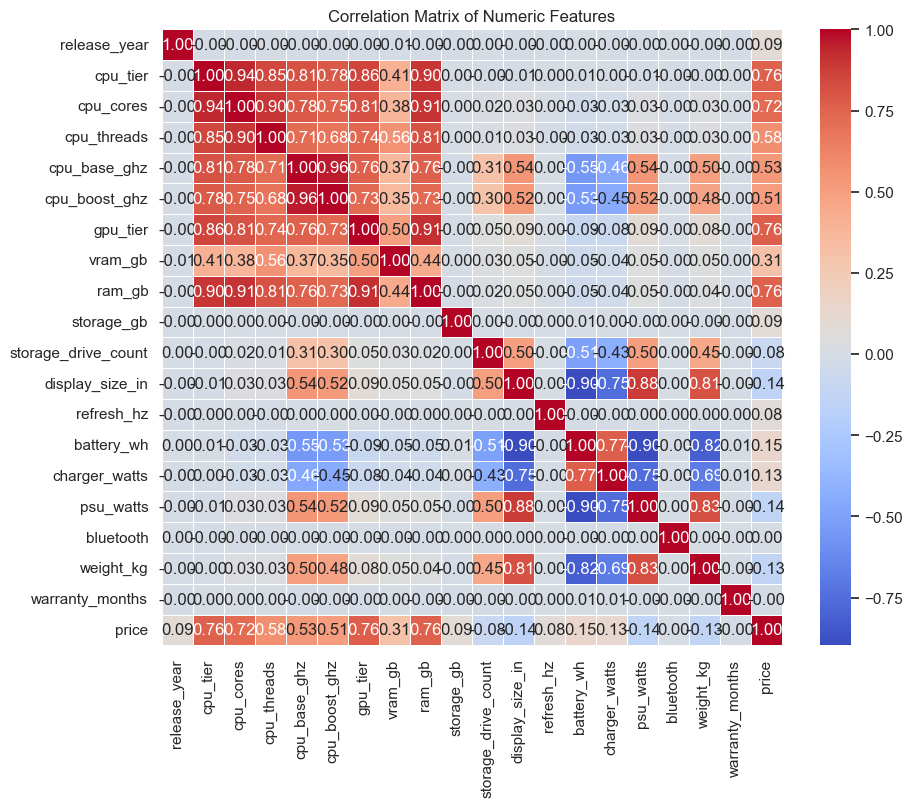


Top correlated pairs (r > 0.4):
cpu_boost_ghz  cpu_base_ghz     0.960884
cpu_base_ghz   cpu_boost_ghz    0.960884
cpu_tier       cpu_cores        0.937376
cpu_cores      cpu_tier         0.937376
gpu_tier       ram_gb           0.912918
ram_gb         gpu_tier         0.912918
cpu_cores      ram_gb           0.906770
ram_gb         cpu_cores        0.906770
               cpu_tier         0.899349
cpu_tier       ram_gb           0.899349
dtype: float64


In [32]:

def correlation_analysis(df):
    num_df = df.select_dtypes(include=[np.number])
    if len(num_df.columns) > 1:
        corr = num_df.corr()
        plt.figure(figsize=(10,8))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Correlation Matrix of Numeric Features")
        plt.show()

        high_corr = corr.unstack().sort_values(ascending=False)
        print("\nTop correlated pairs (r > 0.4):")
        print(high_corr[(high_corr < 1) & (high_corr > 0.4)].head(10))
    else:
        print(" Not enough numeric columns for correlation analysis.")

# Call
correlation_analysis(df)


### Interpretation (after correlation analysis)

- High positive correlation (e.g., RAM vs Price) → Feature strongly influences perceived value.  
- Weak correlation → Feature may not affect price significantly; can deprioritize in cost optimization.  
- Correlation findings guide **feature-based pricing**, helping design structured pricing tiers or bundles.


## 5. Exploratory Visualizations — What & Why

Exploratory visualizations provide visual context for price distribution and brand positioning.  
We analyze:
- **Price Distribution by System Type**  
- **Median Price by Brand**  

**Why This Matters:**  
Visual patterns reveal how different systems and brands occupy distinct price segments—critical for product and marketing decisions.


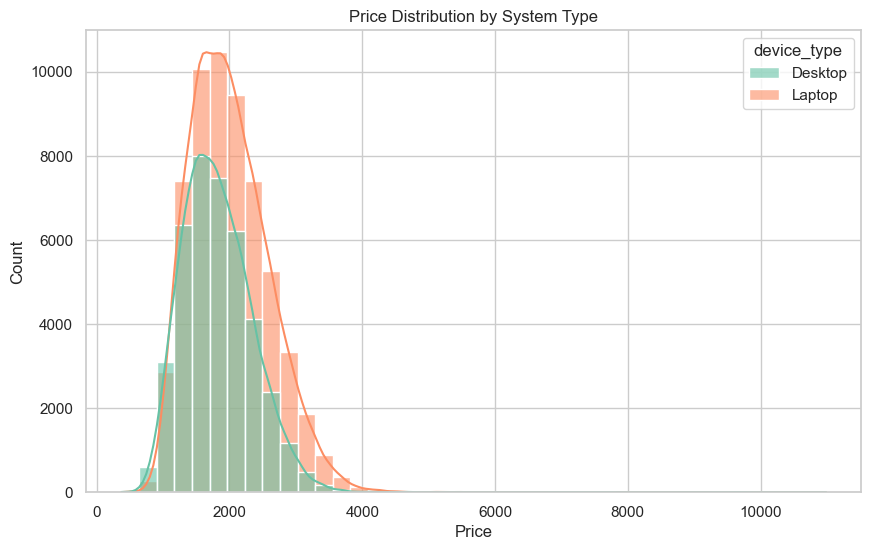

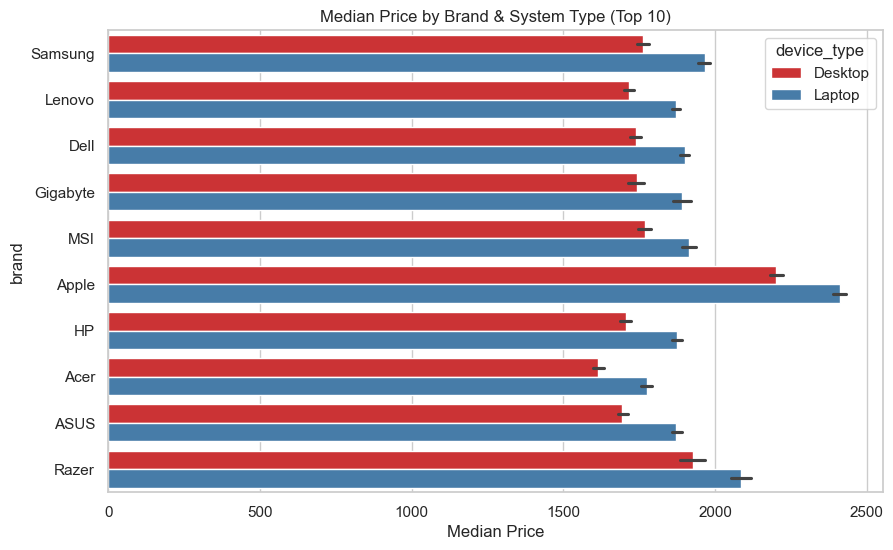

In [34]:

def exploratory_visuals(df, price_col, brand_col, system_col):
    # Price distribution by system
    if price_col:
        plt.figure(figsize=(10,6))
        if system_col:
            sns.histplot(data=df, x=price_col, hue=system_col, kde=True, bins=40, palette="Set2", alpha=0.6)
            plt.title("Price Distribution by System Type")
        else:
            sns.histplot(df[price_col].dropna(), kde=True, bins=40)
            plt.title("Price Distribution")
        plt.xlabel("Price")
        plt.ylabel("Count")
        plt.show()

    # Median price by brand (Top 10)
    if price_col and brand_col:
        top_brands = df[brand_col].value_counts().head(10).index
        top_df = df[df[brand_col].isin(top_brands)]
        plt.figure(figsize=(10,6))
        if system_col:
            sns.barplot(data=top_df, x=price_col, y=brand_col, hue=system_col, estimator=np.median, palette="Set1")
            plt.title("Median Price by Brand & System Type (Top 10)")
        else:
            med = top_df.groupby(brand_col)[price_col].median().sort_values()
            plt.barh(med.index, med.values)
            plt.title("Median Price by Brand (Top 10)")
        plt.xlabel("Median Price")
        plt.show()

# Call
exploratory_visuals(df, price_col, brand_col, system_col)


### Interpretation (after visualizations)

- Desktop systems tend to cluster at higher prices, reflecting their positioning as performance machines.  
- Laptops dominate mid-range price levels, appealing to value-conscious buyers.  
- Premium brands show distinct price separation from mid-tier competitors, highlighting opportunities for targeted brand strategy and pricing differentiation.


## 6. Hypothesis Testing — What & Why

We conduct formal statistical tests (t-tests) to validate whether observed differences in pricing are statistically significant across key groups:
1. **High vs Low RAM**  
2. **Gaming vs Non-Gaming GPUs**  
3. **Intel vs AMD CPUs**

**Why This Matters:**  
Quantitatively confirms whether technical specifications justify price differences or if pricing variation occurs by chance.



=== HYPOTHESIS TESTING WITH VISUALS ===


C:\Users\DOUBLEDO_GAMING\AppData\Local\Temp\ipykernel_24640\3316727809.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="RAM_Group", y=price_col, palette="viridis")


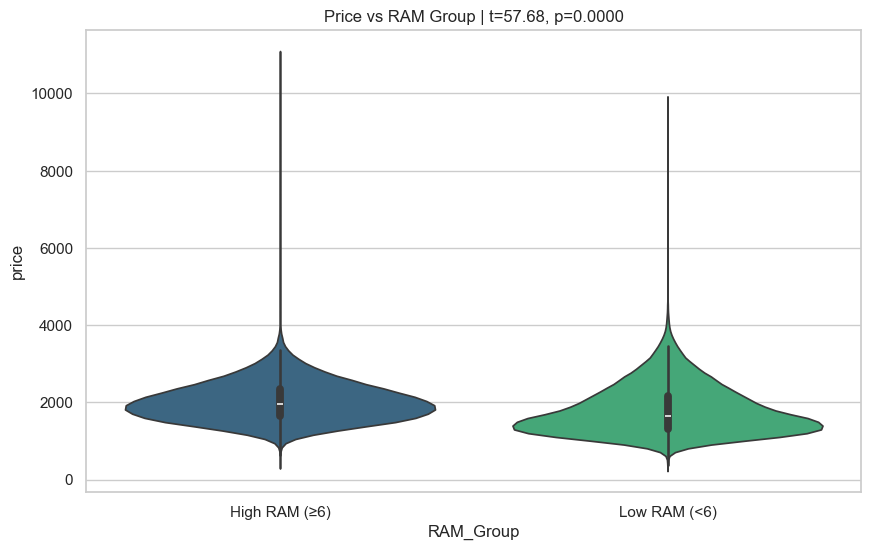

 Reject H₀: Higher RAM affects price


C:\Users\DOUBLEDO_GAMING\AppData\Local\Temp\ipykernel_24640\3316727809.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='GPU_Category', y=price_col, palette="pastel")


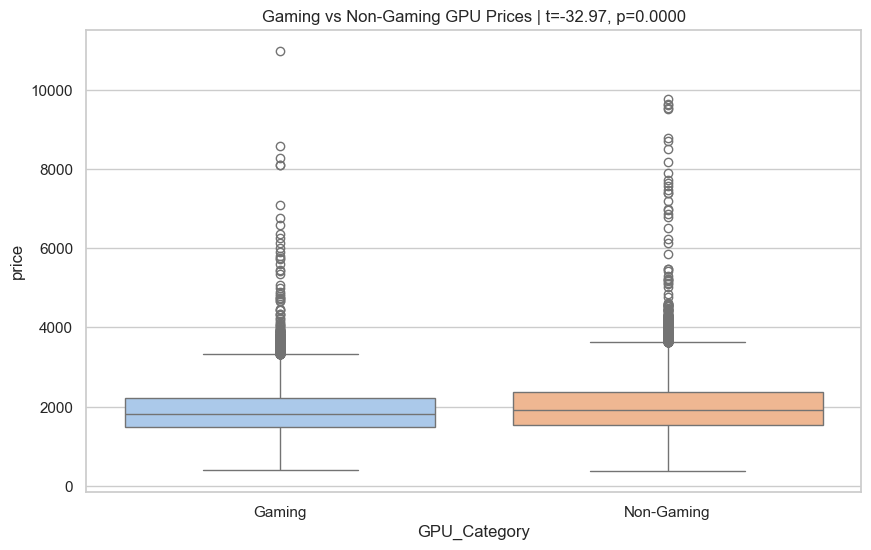

 Reject H₀: Gaming GPUs priced higher


C:\Users\DOUBLEDO_GAMING\AppData\Local\Temp\ipykernel_24640\3316727809.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=valid, x="CPU_Brand", y=price_col, palette="coolwarm")


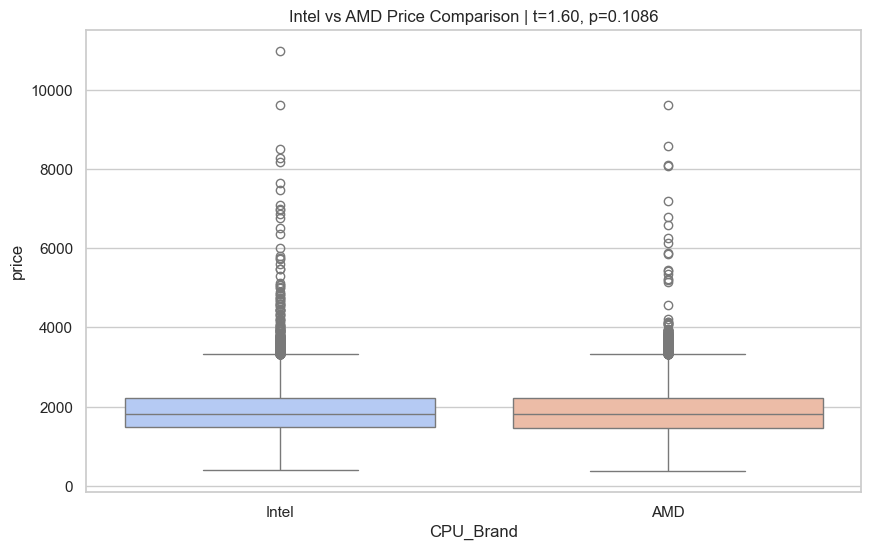

 Fail to reject H₀: No significant CPU price difference


In [35]:

def perform_hypothesis_testing(df, price_col, ram_col, gpu_col, cpu_col):
    print("\n=== HYPOTHESIS TESTING WITH VISUALS ===")

    # (A) RAM tiers
    if price_col and ram_col:
        thr = df[ram_col].median()
        df["RAM_Group"] = np.where(df[ram_col] >= thr, f"High RAM (≥{thr:.0f})", f"Low RAM (<{thr:.0f})")
        high = df[df["RAM_Group"].str.contains("High")][price_col].dropna()
        low  = df[df["RAM_Group"].str.contains("Low")][price_col].dropna()
        if len(high) > 2 and len(low) > 2:
            t, p = stats.ttest_ind(high, low, equal_var=False)
            sns.violinplot(data=df, x="RAM_Group", y=price_col, palette="viridis")
            plt.title(f"Price vs RAM Group | t={t:.2f}, p={p:.4f}")
            plt.show()
            print(" Reject H₀: Higher RAM affects price" if p < 0.05 else " Fail to reject H₀: No significant RAM-price difference")
        else:
            print(" Insufficient samples for RAM t-test.")

    # (B) GPU Gaming vs Non-Gaming
    if price_col and gpu_col:
        gpu_kw = ['RTX','GTX','GEFORCE','RADEON','RX','VEGA','NVIDIA','ARC','QUADRO','TITAN']
        df['GPU_Category'] = np.where(df[gpu_col].astype(str).str.upper().str.contains('|'.join(gpu_kw)), 'Gaming', 'Non-Gaming')
        gaming = df[df['GPU_Category']=='Gaming'][price_col].dropna()
        nongaming = df[df['GPU_Category']=='Non-Gaming'][price_col].dropna()
        if len(gaming) > 2 and len(nongaming) > 2:
            t,p = stats.ttest_ind(gaming, nongaming, equal_var=False)
            sns.boxplot(data=df, x='GPU_Category', y=price_col, palette="pastel")
            plt.title(f"Gaming vs Non-Gaming GPU Prices | t={t:.2f}, p={p:.4f}")
            plt.show()
            print(" Reject H₀: Gaming GPUs priced higher" if p < 0.05 else " Fail to reject H₀: No significant GPU price gap")
        else:
            print(" Insufficient samples for GPU t-test.")

    # (C) CPU Intel vs AMD
    if price_col and cpu_col:
        df["CPU_Brand"] = np.select(
            [df[cpu_col].astype(str).str.contains("intel", case=False),
             df[cpu_col].astype(str).str.contains("amd", case=False)],
            ["Intel", "AMD"], "Other")
        valid = df[df["CPU_Brand"].isin(["Intel", "AMD"])]
        intel = valid[valid["CPU_Brand"]=="Intel"][price_col].dropna()
        amd   = valid[valid["CPU_Brand"]=="AMD"][price_col].dropna()
        if len(intel) > 2 and len(amd) > 2:
            t,p = stats.ttest_ind(intel, amd, equal_var=False)
            sns.boxplot(data=valid, x="CPU_Brand", y=price_col, palette="coolwarm")
            plt.title(f"Intel vs AMD Price Comparison | t={t:.2f}, p={p:.4f}")
            plt.show()
            print(" Reject H₀: One CPU brand priced higher" if p < 0.05 else " Fail to reject H₀: No significant CPU price difference")
        else:
            print(" Insufficient samples for CPU t-test.")

# Call
perform_hypothesis_testing(df, price_col, ram_col, gpu_col, cpu_col)


### Interpretation (after hypothesis testing)

- **High vs Low RAM** → If significant, validates that performance features materially affect price.  
- **Gaming vs Non-Gaming GPUs** → Confirms market premium for gaming systems and high-end GPUs.  
- **Intel vs AMD CPUs** → If no significant difference, indicates parity in pricing—AMD can be positioned as a high-value competitor.  
- Hypothesis testing quantifies relationships that were visually apparent, grounding them in statistical evidence.


## 7. Time Series Analysis — What & Why

We assess how computer prices evolve over time by examining **Median Price by Year**, optionally segmented by system type.

**Why This Matters:**  
Understanding temporal pricing trends helps companies align pricing and marketing strategies with technological evolution and inflation cycles.



=== TIME SERIES ANALYSIS ===


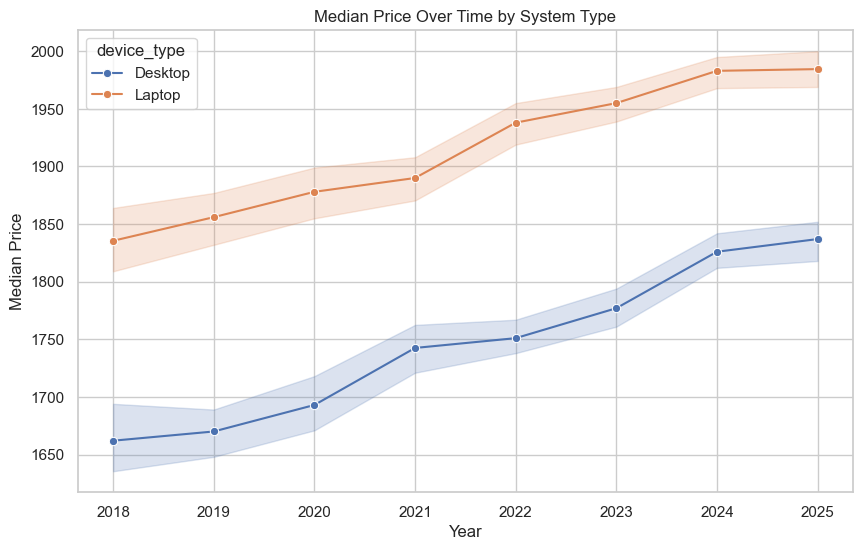

In [36]:

def time_series_analysis(df, price_col, system_col):
    print("\n=== TIME SERIES ANALYSIS ===")
    year_col = next((c for c in df.columns if 'year' in c.lower() and pd.api.types.is_numeric_dtype(df[c])), None)
    if price_col and year_col:
        plt.figure(figsize=(10,6))
        if system_col:
            sns.lineplot(data=df, x=year_col, y=price_col, hue=system_col, estimator=np.median, marker="o")
            plt.title("Median Price Over Time by System Type")
        else:
            yearly = df.groupby(year_col)[price_col].median()
            plt.plot(yearly.index, yearly.values, marker="o")
            plt.title("Median Price Over Time")
        plt.xlabel("Year")
        plt.ylabel("Median Price")
        plt.show()
    else:
        print(" No usable year column found; skipping time series.")

# Call
time_series_analysis(df, price_col, system_col)


### Interpretation (after time-series analysis)

- **Rising median prices** → Reflects consumer shift toward higher-performance configurations and hardware upgrades.  
- **Falling median prices** → Indicates market saturation or increased production efficiency.  
- Tracking these shifts over time informs decisions about product launch schedules and price adjustments.


## 8) Business Insights Summary

We synthesize findings into actionable recommendations you can take to pricing and assortment strategy.

In [37]:

def business_insights():
    print("\n=== BUSINESS INSIGHTS SUMMARY ===")
    print("- RAM strongly influences Price → ideal for upsell tiers.")
    print("- Gaming GPUs show consistent premium pricing → target high-end consumers.")
    print("- Intel vs AMD parity → position AMD as value option.")
    print("- Desktops dominate premium price bands; laptops capture mass-market range.")
    print("- Median prices may rise yearly → inflation and performance-driven shifts.")
    print("- Automated missing-value handling ensures ready-to-use datasets.")

# Call
business_insights()



=== BUSINESS INSIGHTS SUMMARY ===
- RAM strongly influences Price → ideal for upsell tiers.
- Gaming GPUs show consistent premium pricing → target high-end consumers.
- Intel vs AMD parity → position AMD as value option.
- Desktops dominate premium price bands; laptops capture mass-market range.
- Median prices may rise yearly → inflation and performance-driven shifts.
- Automated missing-value handling ensures ready-to-use datasets.


## 8. Business Insights & Strategic Recommendations

This section synthesizes all prior analyses into key strategic takeaways that translate data findings into actionable business guidance.

### Key Analytical Findings
1. RAM and GPU are consistently the most influential factors driving price.  
2. Gaming systems maintain a clear premium, validating the strength of performance-based market segments.  
3. Intel and AMD systems show near parity, suggesting differentiation opportunities through brand messaging rather than pricing.  
4. Desktops sustain higher median prices, while laptops dominate mid-tier affordability.  
5. Price trends over time show gradual increases consistent with technological innovation and inflationary effects.


### Strategic Recommendations
- **Tiered Pricing Models:** Structure product offerings by RAM and GPU configurations.  
- **Gaming Segment Focus:** Expand or emphasize gaming lines where consumers demonstrate higher willingness to pay.  
- **Brand Positioning:** Market AMD as a performance-value brand and Intel as a reliability leader.  
- **Lifecycle Optimization:** Leverage time-series pricing trends to time new releases and clearance sales effectively.  
- **Data Continuity:** Maintain updated datasets for quarterly re-analysis, ensuring strategy aligns with evolving market conditions.
